In [12]:
import numpy as np
import pandas as pd
from itertools import product
from pulp import LpVariable, lpSum, value
from ortoolpy import model_min, addvars, addvals

df_tc = pd.read_csv('trans_cost.csv', index_col="공장")
df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')

np.random.seed(1)
nw = len(df_tc.index)
nf = len(df_tc.columns)
pr = list(product(range(nw), range(nf)))

m1 = model_min()
v1 = {(i,j):LpVariable('v%d_%d'%(i,j), lowBound=0) for i,j in pr}
#dict 형식으로 정의한다. 

m1 += lpSum(df_tc.iloc[i][j]*v1[i,j] for i,j in pr)


for i in range(nw):
    m1 += lpSum(v1[i,j] for j in range(nf)) <= df_supply.iloc[0][i]
for j in range(nf):
    m1 += lpSum(v1[i,j] for i in range(nw)) >= df_demand.iloc[0][j]

m1.solve()

#총 운송 비용 계산
df_tr_sol = df_tc.copy()
total_cost = 0
for k,x in v1.items():
    i,j = k[0], k[1]
    df_tr_sol.iloc[i][j] = value(x)
    total_cost +=df_tc.iloc[i][j] * value(x)
print(df_tr_sol)
print('총 운송 비용' , str(total_cost))




NoName:
MINIMIZE
10*v0_0 + 10*v0_1 + 11*v0_2 + 27*v0_3 + 18*v1_0 + 21*v1_1 + 12*v1_2 + 14*v1_3 + 15*v2_0 + 12*v2_1 + 14*v2_2 + 12*v2_3 + 0
VARIABLES
v0_0 Continuous
v0_1 Continuous
v0_2 Continuous
v0_3 Continuous
v1_0 Continuous
v1_1 Continuous
v1_2 Continuous
v1_3 Continuous
v2_0 Continuous
v2_1 Continuous
v2_2 Continuous
v2_3 Continuous

    F1  F2  F3  F4
공장                
W1  28   7   0   0
W2   0   0  31   5
W3   0  22   0  20
총 운송 비용 1296.0


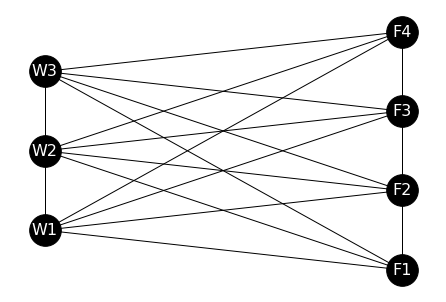

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

df_tr = pd.read_csv('trans_route.csv')
df_pos = pd.read_csv('trans_route_pos.csv')

G = nx.Graph()

for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

num_pre = 0
edge_weights = [] 
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            # 엣지 추가
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
            # 엣지 가중치 추가
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if(df_pos.columns[i] in df_tr.columns)and(df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                        weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
                    elif(df_pos.columns[j] in df_tr.columns)and(df_pos.columns[i] in df_tr.index):
                        weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
                    edge_weights.append(weight)


pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])


nx.draw(G, pos, with_labels=True, font_size=16, node_size = 1000, node_color = 'k',font_color='w', width=edge_weights)
plt.show()






In [21]:
import numpy as np
import pandas as pd

df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')

def condition_demand(df_tr, df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum>=df_demand.iloc[0][i]):
            flag[i] = 1
    return flag
    
def condition_supply(df_tr,df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if (temp_sum<=df_supply.loc[0][i]):
            flag[i] = 1
    return flag

print('수요 조건 계산 결과', str(condition_demand(df_tr_sol, df_demand)))
print('공급 조건 계산 결과', str(condition_supply(df_tr_sol, df_supply)))


수요 조건 계산 결과 [1. 1. 1. 1.]
공급 조건 계산 결과 [1. 1. 1.]
